In [10]:
import os, sys, json
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pcdl 
import pandas as pd

In [25]:
mcdsts = pcdl.TimeSeries(output_path = '/home/oth/BSC/MN5mount/AGS/PhysiBoSS/output', graph=True)

reading: /home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_setting_xml : <variable name="oxygen" ID="0"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_X" ID="1"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_Y" ID="2"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><cycle><phase_durations> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><motility><options><advanced_chemotaxis> node missing.
Warning @ pyMCDS._read_setting_xml : cell_definition custom_data without variable type setting detected. ['K_half_apoptosis', 'K_half_growth', 'apoptosis_rate_basal', 'basal_growth_rate', 'drug_X_Hill_coeff', 'drug_X_half_max', 'drug_X_permeability', 'drug_Y_Hill_coeff', 'drug_Y_half_max', 'drug_Y_permeability', 'hill_coeff_apoptosis', 'hill_coeff_

In [28]:
mcdsts.plot_scatter()  # jpeg images colored by cell_type
mcdsts.plot_contour(focus='oxygen')  # jpeg images colored by oxygen values

s set to 71.
px figure size set to [1200, 1284].
z_axis detected: {'default'}.
xlim set to: (-300.0, 300.0).
ylim set to: (-300.0, 300.0).
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
min max extrema set to: [None, None].
categories found: {'default'}.
mi

'/home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/conc_oxygen_z0.0/'

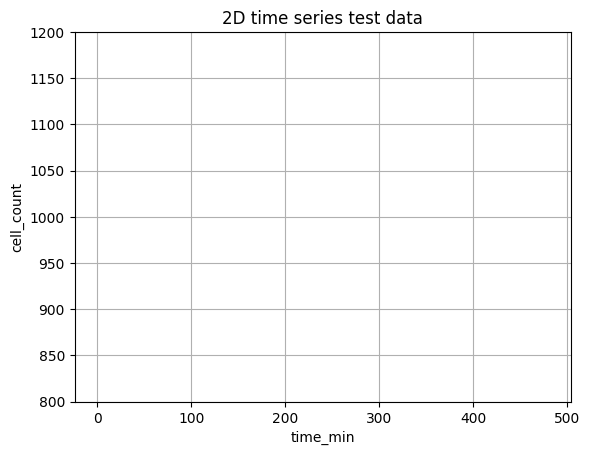

In [27]:
# loop over the time series to gather temporal information like, for example, data for a growth curve
lr_time = [mcds.get_time() for mcds in mcdsts.get_mcds_list()]  # [0.0, 60.0, ..., 1440.0]
li_cellcount = [mcds.get_cell_df().shape[0] for mcds in mcdsts.get_mcds_list()]  # [889, 898, ..., 1099]

# pack data into a pandas datafarm
df = pd.DataFrame([lr_time,li_cellcount], index=['time_min','cell_count']).T
df.head()

# plot data
df.plot(
    kind = 'scatter',
    x = 'time_min',
    y = 'cell_count',
    s = 36,
    ylim = (800,1200),
    grid=True,
    title='2D time series test data'
)

# save plot to file
fig, ax = plt.subplots()
df.plot(
    kind = 'scatter',
    x = 'time_min',
    y = 'cell_count',
    s = 36,
    ylim = (800,1200),
    grid = True,
    title = '2D time series test data',
    ax = ax,
)
plt.tight_layout()
fig.savefig('pymcdsts_2d_cellcount.png', facecolor='white')
plt.close()

In [21]:
mcds = pcdl.TimeStep(xmlfile = "/home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/output00000005.xml",graph=True)

reading: /home/oth/BSC/MN5mount/AGS/PhysiBoSS/output/PhysiCell_settings.xml
Warning @ pyMCDS._read_setting_xml : <variable name="oxygen" ID="0"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_X" ID="1"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <variable name="drug_Y" ID="2"><Dirichlet_options> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><cycle><phase_durations> node missing.
Warning @ pyMCDS._read_setting_xml : <cell_definition name="default" ID="0"><phenotype><motility><options><advanced_chemotaxis> node missing.
Warning @ pyMCDS._read_setting_xml : cell_definition custom_data without variable type setting detected. ['K_half_apoptosis', 'K_half_growth', 'apoptosis_rate_basal', 'basal_growth_rate', 'drug_X_Hill_coeff', 'drug_X_half_max', 'drug_X_permeability', 'drug_Y_Hill_coeff', 'drug_Y_half_max', 'drug_Y_permeability', 'hill_coeff_apoptosis', 'hill_coeff_

categories found: {'default'}.
min max extrema set to: [None, None].
xlim set to: (-600.0, 600.0).
ylim set to: (-600.0, 600.0).
z_slice set to 0.0.


/tmp/ipykernel_8406/1859386210.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
/tmp/ipykernel_8406/1859386210.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


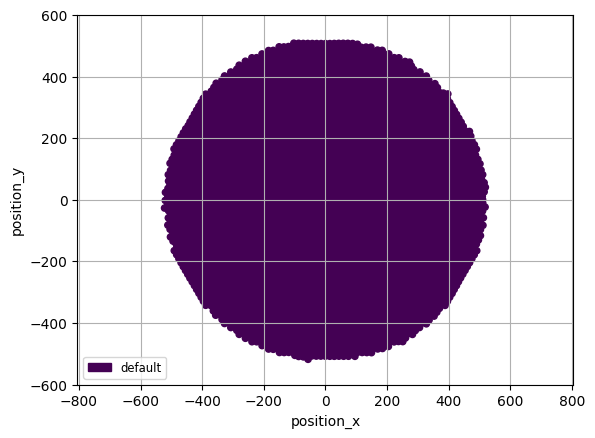

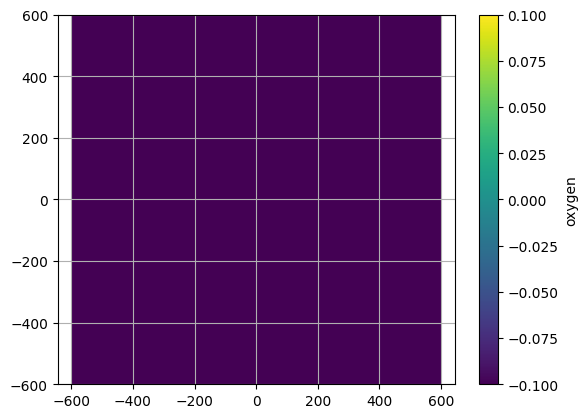

In [22]:
# scatter plot
fig = mcds.plot_scatter()  # default focus is cell_type and z_slice=0
fig.show()

fig = mcds.plot_contour('oxygen', z_slice=3.333)
fig.show()

In [23]:
# attached graph
graph = mcds.get_attached_graph_dict()
len(graph)  # 992

# neighbor graph
graph = mcds.get_neighbor_graph_dict()
len(graph)  # 992
graph.keys()  # dict_keys([0, 1, ..., 993])
graph[0]  # {1, 31, 33, 929, 935, 950}

print(graph.keys(), graph[0])

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,